In [1]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the original image
f = cv2.imread('img.jpg')

# Convert the original image to grayscale
gray_image = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

# Generate Canny edge detection image
canny_e = cv2.Canny(gray_image, 100, 150)

# Apply Marr-Hildreth edge detection using LoG filter
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian_abs = np.absolute(laplacian)
marr_hildreth_e = cv2.convertScaleAbs(laplacian_abs)

# Define the random constant c
c = 1

# Perform the element-wise addition for Canny
g_canny = cv2.add(f, cv2.merge([canny_e] * 3) * c)
g_canny = np.clip(g_canny, 0, 255).astype(np.uint8)

# Perform the element-wise addition for Marr-Hildreth
g_marr_hildreth = cv2.add(f, cv2.merge([marr_hildreth_e] * 3) * c)
g_marr_hildreth = np.clip(g_marr_hildreth, 0, 255).astype(np.uint8)

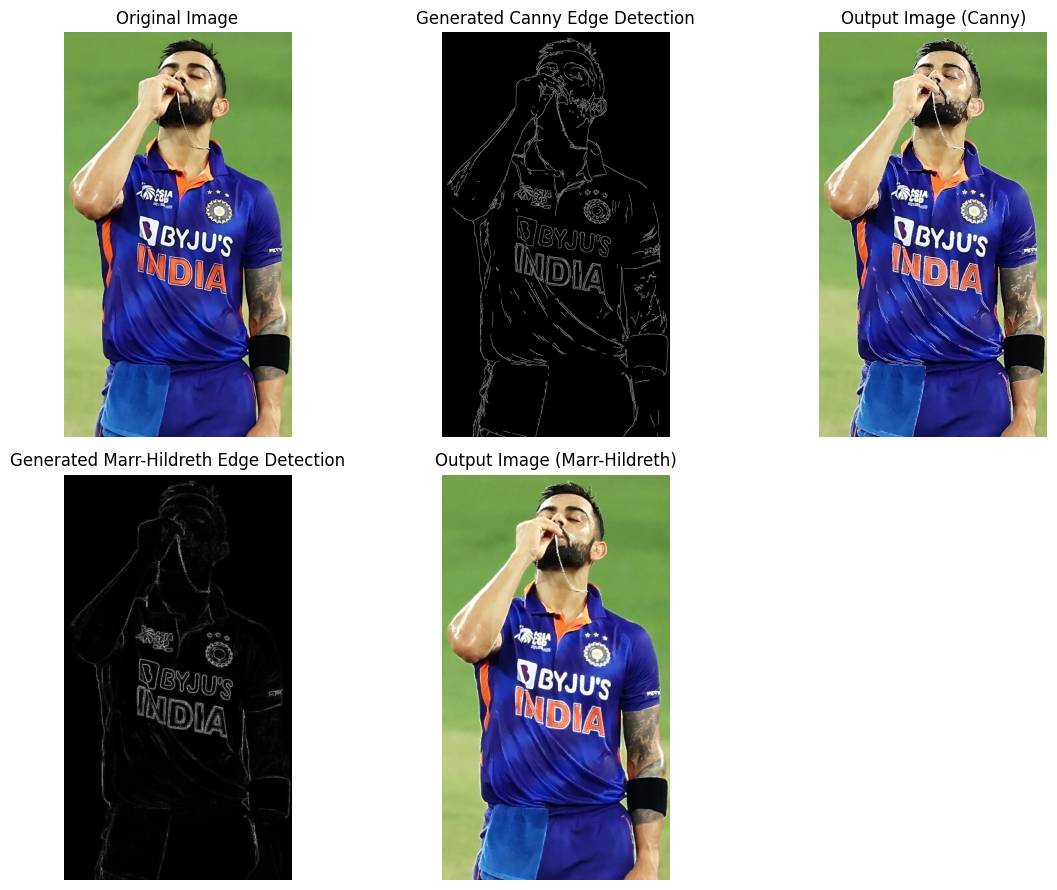

In [3]:
# Display the images
plt.figure(figsize=(12, 9))

# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the generated Canny edge detection image
plt.subplot(2, 3, 2)
plt.imshow(canny_e, cmap='gray')
plt.title('Generated Canny Edge Detection')
plt.axis('off')

# Display the generated output image for Canny
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(g_canny, cv2.COLOR_BGR2RGB))
plt.title('Output Image (Canny)')
plt.axis('off')

# Display the generated Marr-Hildreth edge detection image
plt.subplot(2, 3, 4)
plt.imshow(marr_hildreth_e, cmap='gray')
plt.title('Generated Marr-Hildreth Edge Detection')
plt.axis('off')

# Display the generated output image for Marr-Hildreth
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(g_marr_hildreth, cv2.COLOR_BGR2RGB))
plt.title('Output Image (Marr-Hildreth)')
plt.axis('off')

# Adjust spacing between images
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()
plt.show()